In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


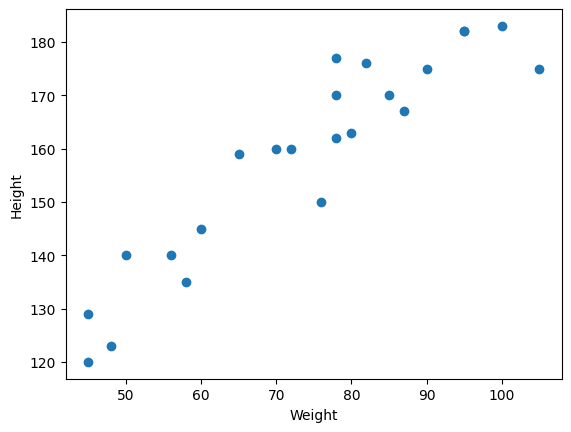

In [4]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [5]:
#Problem statement>> To predict height based on weight

In [6]:
X = df[['Weight']]
y = df['Height']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17, 1), (6, 1), (17,), (6,))

In [10]:
#scaling(optional) >> standardization>> fit_transform on train data and transform on test data
#if you use fit on test data, (that is wrong) you are doing data leakage, avoid it
#most of the ml model standardscaler is used as it deals with normal distribution

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
scaler

StandardScaler()

In [14]:
#scaling should be done always after train test split
#target variable should not be scaled
#avoid scaling categorical features

In [15]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

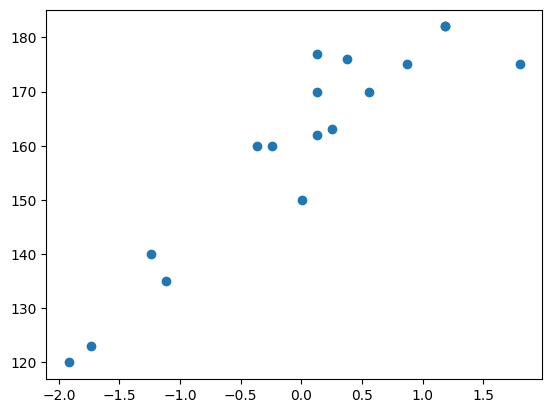

In [16]:
plt.scatter(X_train, y_train)

In [17]:
# model training
from sklearn.linear_model import LinearRegression

In [18]:
#linear regression parameters
#fit_intercept >> The best fit line will have intercept, by default it is true
#copy_X >> copy the original X_train and then build the model, it will not modify the original data
#n_jobs >>-1 means using all processors.
#positive>> When set to True, forces the coefficients to be positive.

#fit>> train the model
#predict>> test the model

#after building the model, you have attributes of the model
#coef_
#intercept

In [19]:
regression = LinearRegression()

In [20]:
regression

LinearRegression()

In [21]:
regression.fit(X_train, y_train)

LinearRegression()

In [22]:
regression.coef_

array([17.7307072])

In [23]:
regression.intercept_

np.float64(160.0)

In [24]:
print("The slope or coeff of model is ", regression.coef_)
print("The intercept of the model is ", regression.intercept_)

The slope or coeff of model is  [17.7307072]
The intercept of the model is  160.0


In [25]:
#prediction on train data
#interpretation of coef>> one unit increase in weight, on average the height increase by 17.73 units
#predicted height(y) on Xtrain = 160 + 17.73 * (Xtrain)

#predicted height(y) on Xtest = 160 + 17.73 * (Xtest)

In [26]:
#prediction on train
regression.predict(X_train)

array([166.65863288, 153.47066096, 129.29271243, 160.06464692,
       164.46063756, 175.45061417, 140.28268904, 169.95562586,
       125.99571945, 162.26264224, 155.66865628, 138.08469371,
       162.26264224, 180.94560247, 191.93557907, 180.94560247,
       162.26264224])

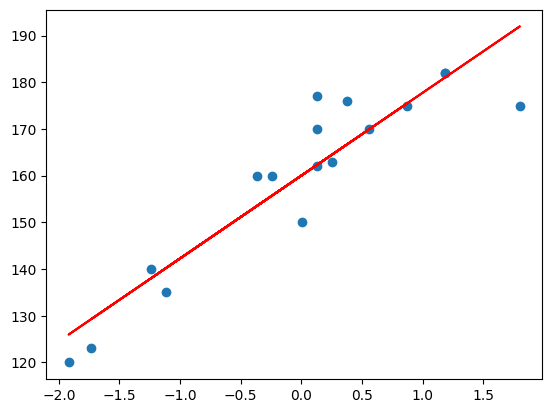

In [27]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train), color='red')
plt.show()

In [28]:
y_pred = regression.predict(X_test)
y_pred

array([125.99571945, 147.97567266, 142.48068436, 186.44059077,
       172.15362118, 131.49070775])

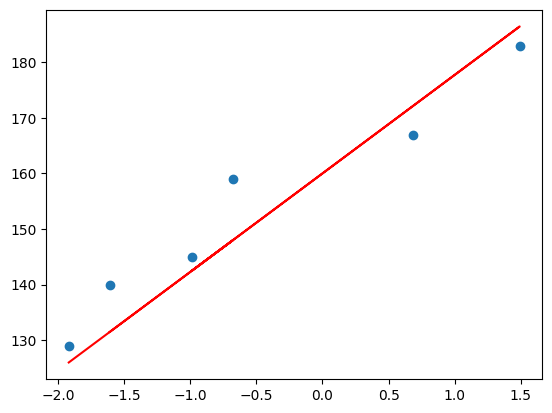

In [29]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.show()

In [30]:
#performance metrics

In [31]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [32]:
mean_absolute_error(y_test, y_pred)

5.608571289304838

In [33]:
mean_squared_error(y_test, y_pred)

41.285662830455514

In [34]:
rsq = r2_score(y_test, y_pred)
rsq

0.8721036174256606

In [35]:
#adjusted rsquare
#adjusted R2  = [1-(1-rsquare)*n-1/(n-k-1)] #n is no of observation and k is no of predictor variables

In [36]:
X_test.shape

(6, 1)

In [37]:
adjustedR2 = 1-(1-rsq)*(len(y_test)-1)/(len(y_test)- X_test.shape[1]-1)
adjustedR2

0.8401295217820757

In [38]:
#adjusted rsquare will be lesser than r square

In [39]:
#assumption
#X-y should have linear relationship
#Observation should have no relation
#error should have constant variation
#error should be normally distributed
#features among themself should be least related

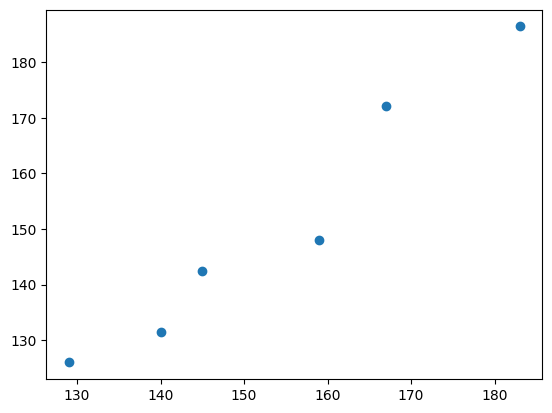

In [40]:
plt.scatter(y_test, y_pred)
#to check if y_test and its prediction aligns

In [41]:
error = y_test-y_pred
error

,Height
20,3.004281
17,11.024327
3,2.519316
13,-3.440591
19,-5.153621
16,8.509292


/tmp/ipython-input-42-464779861.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error)


<Axes: xlabel='Height', ylabel='Density'>

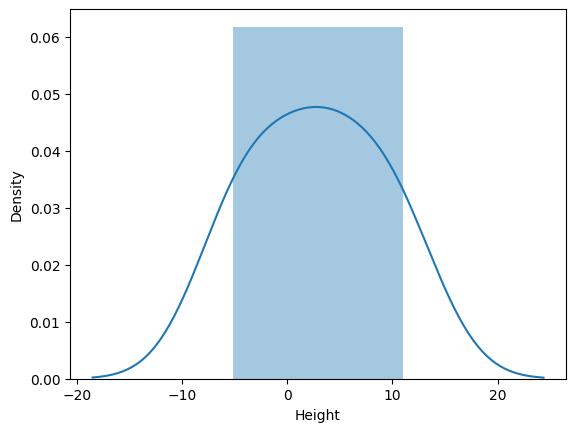

In [42]:
import seaborn as sns
sns.distplot(error)

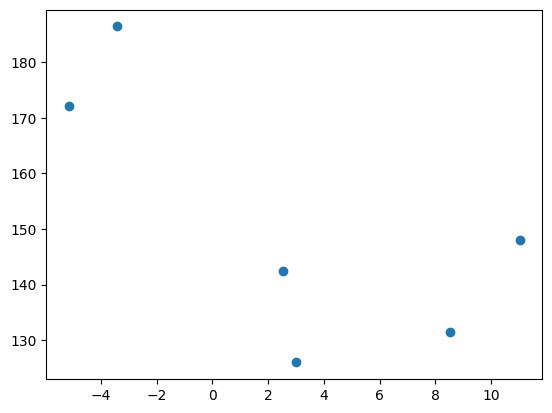

In [43]:
#to check constant variance
plt.scatter(error, y_pred)